# A Fuzzy Case Based Reasoning Approach To Value Engineering

The paper presents three main algorithms to improve **case retrieval**, **fuzzy clustering**, and **case adaptation**. Below, I provide a structured explanation of each algorithm with the necessary mathematical formulations.

## Traffic Accidents DataSet :
### About Dataset:
### 🌍 **Dataset Description**

This dataset contains data aimed at predicting the likelihood and severity of traffic accidents based on a variety of factors, including weather conditions, road types, traffic density, driver behavior, and more. It includes features such as weather, road conditions, time of day, vehicle types, driver age, and experience, providing a comprehensive view of the variables that contribute to traffic accidents.

### <font color=''>📊 **Columns:**</font>
- <font color='brown'>**Weather:**</font> The impact of weather conditions on the likelihood of accidents.

    - **Clear:** No adverse weather conditions.
    - **Rainy:** Rainy conditions increase the chance of accidents.
    - **Foggy:** Foggy conditions reduce visibility, increasing accident chances.
    - **Snowy:** Snow can cause slippery roads and higher accident probability.
    - **Stormy:** Stormy weather can create hazardous driving conditions.

- <font color='brown'>**Road_Type:**</font> The type of road, influencing the probability of accidents.

    - **Highway:** High-speed roads with higher chances of severe accidents.
    - **City Road:** Roads within city limits, typically with more traffic and lower speeds.
    - **Rural Road:** Roads outside urban areas, often with fewer vehicles and lower speeds.
    - **Mountain Road:** Roads with curves and elevation changes, increasing accident risk.

- <font color='brown'>**Time_of_Day:**</font> The time of day when the accident occurs.

    - **Morning:** The period between sunrise and noon.
    - **Afternoon:** The period between noon and evening.
    - **Evening:** The period just before sunset.
    - **Night:** The nighttime, often associated with reduced visibility and higher risk.

- <font color='brown'>**Traffic_Density:**</font> The level of traffic on the road.

    - **0:** Low density (few vehicles).
    - **1:** Moderate density.
    - **2:** High density (many vehicles).

- <font color='brown'>**Speed_Limit:**</font> The maximum allowed speed on the road.

- <font color='brown'>**Number_of_Vehicles:**</font> The number of vehicles involved in the accident, ranging from 1 to 5.

- <font color='brown'>**Driver_Alcohol:**</font> Whether the driver consumed alcohol.

    - **0:** No alcohol consumption.
    - **1:** Alcohol consumption (which increases the likelihood of an accident).

- <font color='brown'>**Accident_Severity:**</font> The severity of the accident.

    - **Low:** Minor accident.
    - **Moderate:** Moderate accident with some damage or injuries.
    - **High:** Severe accident with significant damage or injuries.

- <font color='brown'>**Road_Condition:**</font> The condition of the road surface.

    - **Dry:** Dry roads with minimal risk.
    - **Wet:** Wet roads due to rain, increasing the risk of accidents.
    - **Icy:** Ice on the road, significantly increasing the risk of accidents.
    - **Under Construction:** Roads under construction, which may have obstacles or poor road quality.

- <font color='brown'>**Vehicle_Type:**</font> The type of vehicle involved in the accident.

    - **Car:** A regular passenger car.
    - **Truck:** A large vehicle used for transporting goods.
    - **Motorcycle:** A two-wheeled motor vehicle.
    - **Bus:** A large vehicle used for public transportation.

- <font color='brown'>**Driver_Age:**</font> The age of the driver. Values range from 18 to 70 years old.

- <font color='brown'>**Driver_Experience:**</font> The years of experience the driver has. Values range from 0 to 50 years of experience.

- <font color='brown'>**Road_Light_Condition:**</font> The lighting conditions on the road.

    - **Daylight:** Daytime, when visibility is typically good.
    - **Artificial Light:** Road is illuminated with streetlights.
    - **No Light:** Road is not illuminated, typically during the night in poorly lit areas.


## Understanding the Problem

### 1.1 Define the Objective
- The goal is to predict Accident Severity based on multiple influencing factors such as Weather, Road Type, Traffic Density, Driver Alcohol Consumption, and more.
- The dataset contains a mix of:
    - Categorical Variables (e.g., Weather, Road Type).
    - Numerical Variables (e.g., Speed Limit, Driver Age).
    - Binary Variables (e.g., Driver Alcohol Consumption).

To handle uncertainties and linguistic data, we will use Fuzzy CBR, which:

- Represents uncertain information using fuzzy logic.
- Retrieves past cases efficiently using fuzzy clustering.
- Adapts retrieved cases for improved predictions.

### 1.2 Dataset Overview

| Feature              | Type              | Description |
|----------------------|------------------|------------------------------------------------------------|
| <font color='brown'>**Weather**</font>             | Categorical       | Impact of weather on accidents (Clear, Rainy, Foggy, Snowy, Stormy) |
| <font color='brown'>**Road_Type**</font>          | Categorical       | Type of road (Highway, City Road, Rural Road, Mountain Road) |
| <font color='brown'>**Time_of_Day**</font>        | Categorical       | Time of day (Morning, Afternoon, Evening, Night) |
| <font color='brown'>**Traffic_Density**</font>    | Numeric (0-2)     | 0 = Low, 1 = Moderate, 2 = High |
| <font color='brown'>**Speed_Limit**</font>       | Numeric (km/h)    | Maximum speed allowed |
| <font color='brown'>**Number_of_Vehicles**</font> | Numeric (1-5)     | Number of vehicles involved |
| <font color='brown'>**Driver_Alcohol**</font>    | Binary (0,1)      | 0 = No Alcohol, 1 = Alcohol |
| <font color='brown'>**Accident_Severity**</font> | Categorical       | Severity (Low, Moderate, High) |
| <font color='brown'>**Road_Condition**</font>    | Categorical       | Road condition (Dry, Wet, Icy, Under Construction) |
| <font color='brown'>**Vehicle_Type**</font>      | Categorical       | Type of vehicle (Car, Truck, Motorcycle, Bus) |
| <font color='brown'>**Driver_Age**</font>       | Numeric (18-70)   | Age of the driver |
| <font color='brown'>**Driver_Experience**</font> | Numeric (0-50)    | Years of driving experience |
| <font color='brown'>**Road_Light_Condition**</font> | Categorical | Lighting condition (Daylight, Artificial Light, No Light) |

### 1.3 What Makes This a Fuzzy Problem?

Some features involve linguistic values (e.g., "Rainy," "Night"), which are best handled using Fuzzy Sets.
Other features have uncertainty (e.g., "Accident Severity"), which should be represented fuzzily.

### 1.4 Why Use Fuzzy Case-Based Reasoning (CBR)?

✅ Handles uncertainty in weather, road type, and driver behavior.

✅ Finds similar past cases using fuzzy similarity.

✅ Learns from experience without requiring complex model training.


## Importing libraries

In [273]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from typing import List, Tuple, Dict, Union
from sklearn.metrics import mean_squared_error
from datetime import datetime
import skfuzzy as fuzz

## Define Triangular Fuzzy Numbers (TFNs)
The **TFN** class represents a Triangular Fuzzy Number, which is a type of fuzzy number characterized by three values: **left**, **center**, and **right**. These values define the triangular shape of the membership function. The class also supports linguistic terms to describe the fuzzy number in natural language.
Functionality:

- Represents fuzzy numbers with triangular membership functions.
 
- Supports linguistic terms for human-readable descriptions.
 
- Provides methods to compute alpha-cuts, which are intervals at a specific membership level.

In [274]:
class TFN:
    """Triangular Fuzzy Number class with linguistic term support"""
    def __init__(self, left: float, center: float, right: float, linguistic_term: str = None):
        self.left = left
        self.center = center
        self.right = right
        self.linguistic_term = linguistic_term
    
    def alpha_cut(self, alpha: float) -> Tuple[float, float]:
        """Get alpha-cut interval of the fuzzy number"""
        left_alpha = self.left + alpha * (self.center - self.left)
        right_alpha = self.right - alpha * (self.right - self.center)
        return (left_alpha, right_alpha)


## Define Accident Cases
The AccidentCase class represents a traffic accident case with fuzzy features. Each case contains a set of features (represented as fuzzy numbers or linguistic terms), a severity level, and a unique case ID. It also stores cluster membership information for clustering purposes.
Functionality:

- Represents a traffic accident case with fuzzy features.
- Stores the severity of the accident and a unique identifier.
- Supports clustering by storing membership values for each cluster.

Key Attributes:

- <font color='brown'>**features:**</font> A dictionary of features, where each feature is either a TFN or a linguistic term.
- <font color='brown'>**severity:**</font> The severity of the accident (e.g., "Low", "Moderate", "High").
- <font color='brown'>**case_id:**</font> A unique identifier for the case.
- <font color='brown'>**cluster_membership:**</font> A list of membership values for each cluster (used in fuzzy clustering).

In [275]:
class AccidentCase:
    """Represents a traffic accident case with fuzzy features"""
    def __init__(self, features: Dict[str, Union[TFN, str]], severity: str, case_id: str):
        self.features = features
        self.severity = severity
        self.case_id = case_id
        self.cluster_membership = None


## Define Safety Rule 
The SafetyRule class represents a safety rule that can be applied to traffic accident cases. Each rule consists of a condition (a callable function), a recommendation, and a priority level.
Functionality:

- Represents a safety rule with a condition, recommendation, and priority.
- The condition is a function that evaluates whether the rule applies to a given case.
- The recommendation is a string describing the safety measure to be taken.
- The priority determines the order in which rules are applied.

Key Attributes:

- <font color='brown'>**condition:**</font> A callable function that evaluates whether the rule applies to a case.
- <font color='brown'>**recommendation:**</font> A string describing the safety recommendation.
- <font color='brown'>**priority:**</font> An integer representing the priority of the rule (lower values indicate higher priority).

In [276]:
class SafetyRule:
    def __init__(self, condition: callable, recommendation: str, priority: int):
        self.condition = condition
        self.recommendation = recommendation
        self.priority = priority


## Define Solution 
The Solution class represents the output of the prediction process. It includes the predicted severity (as a fuzzy number), a list of recommendations, and a confidence score.
Functionality:

- Represents the solution generated by the system for a given query case.
- Stores the predicted severity, recommendations, confidence score, and timestamp.
- Supports feedback for retaining solutions in the case library.

Key Attributes:

- <font color='brown'>**severity:**</font> The predicted severity of the accident (as a TFN).
- <font color='brown'>**recommendations:**</font> A list of safety recommendations.
- <font color='brown'>**confidence:**</font> A confidence score for the prediction.
- <font color='brown'>**timestamp:**</font> The time when the solution was generated.
- <font color='brown'>**feedback:**</font> Optional feedback for retaining the solution.

In [277]:
class Solution:
    def __init__(self, severity: str, recommendations: List[str], confidence: float):
        self.severity = severity  # Now a TFN object
        self.recommendations = recommendations
        self.confidence = confidence
        self.timestamp = datetime.now()
        self.feedback = None


## Accident Fuzzy CBR System
The TrafficAccidentFuzzyCBR class is the core of the system. It implements a Fuzzy Case-Based Reasoning (CBR) approach for predicting accident severity and generating safety recommendations. The class uses fuzzy logic, clustering, and similarity measures to retrieve and reuse past cases.
Functionality:

- Preprocesses raw data into fuzzy cases.
- Performs fuzzy clustering on cases using the Fuzzy C-Means (FCM) algorithm.
- Retrieves similar cases using a weighted similarity measure.
- Predicts accident severity using fuzzy weighted voting.
- Generates safety recommendations based on predefined rules.

In [278]:
class TrafficAccidentFuzzyCBR:
    
    def __init__(self, num_clusters: int = 2):
        self.case_library = []
        self.num_clusters = num_clusters
        self.clusters = None
        self.feature_weights = self._initialize_feature_weights()
        self.linguistic_mappings = self._initialize_linguistic_mappings()
        self.numerical_imputer = SimpleImputer(strategy='mean')
        self.categorical_imputer = SimpleImputer(strategy='most_frequent') # Most frequent
        self.scaler = MinMaxScaler()
        self.min_similarity_threshold = 0.01  # Add minimum similarity threshold
        self.safety_rules = self._initialize_safety_rules()
        self.solution_history = []
        self.validation_metrics = {
            'mse': [],
            'accuracy': [],
            'recommendation_effectiveness': []
        }
        # Parameters for skfuzzy cmeans
        self.fcm_m = 2.0  # Fuzziness parameter
        self.fcm_error = 0.001  # Error tolerance
        self.fcm_maxiter = 100  # Maximum number of iterations
        self.fcm_init = None  # Initial fuzzy c-partitioned matrix
        
    def _initialize_feature_weights(self) -> Dict[str, float]:
        """Initialize feature weights based on domain knowledge"""
        return {
            # Adjusted weights based on importance
            'Weather': 0.15, 
            'Road_Type': 0.1,
            'Time_of_Day': 0.05,
            'Traffic_Density': 0.1,
            'Speed_Limit': 0.1,
            'Driver_Alcohol': 0.15,
            'Road_Condition': 0.1,
            'Vehicle_Type': 0.05,
            'Driver_Age': 0.1,
            'Driver_Experience': 0.05,
            'Road_Light_Condition': 0.05
        }
    
    def _initialize_safety_rules(self) -> List[SafetyRule]:
        """Initialize comprehensive safety rules for accident prevention"""
        rules = [
            # Weather-related rules
            SafetyRule(
                lambda case: (
                    'Weather' in case.features and
                    hasattr(case.features['Weather'], 'linguistic_term') and
                    case.features['Weather'].linguistic_term in ['Rainy', 'Snowy'] and
                    'Speed_Limit' in case.features and
                    case.features['Speed_Limit'].center > 0.6
                ),
                "Reduce speed by 30% in adverse weather conditions",
                1
            ),
            SafetyRule(
                lambda case: (
                    'Weather' in case.features and
                    hasattr(case.features['Weather'], 'linguistic_term') and
                    case.features['Weather'].linguistic_term == 'Foggy'
                ),
                "Activate fog lights and maintain increased following distance",
                1
            ),
            
            # Driver condition rules
            SafetyRule(
                lambda case: (
                    'Driver_Alcohol' in case.features and
                    isinstance(case.features['Driver_Alcohol'], TFN) and
                    case.features['Driver_Alcohol'].center > 0
                ),
                "Immediate suspension of driving privileges and mandatory safety course",
                1
            ),
            SafetyRule(
                lambda case: (
                    'Driver_Experience' in case.features and
                    isinstance(case.features['Driver_Experience'], TFN) and
                    case.features['Driver_Experience'].center < 0.3
                ),
                "Additional driver training and supervised driving hours required",
                2
            ),
            
            # Visibility and lighting rules
            SafetyRule(
                lambda case: (
                    'Time_of_Day' in case.features and
                    'Road_Light_Condition' in case.features and
                    hasattr(case.features['Time_of_Day'], 'linguistic_term') and
                    hasattr(case.features['Road_Light_Condition'], 'linguistic_term') and
                    case.features['Time_of_Day'].linguistic_term == 'Night' and
                    case.features['Road_Light_Condition'].linguistic_term == 'No Light'
                ),
                "Install additional road lighting and reflective markers",
                2
            ),
            SafetyRule(
                lambda case: (
                    'Time_of_Day' in case.features and
                    hasattr(case.features['Time_of_Day'], 'linguistic_term') and
                    case.features['Time_of_Day'].linguistic_term in ['Evening', 'Night']
                ),
                "Ensure all vehicle lights are functional and use high-visibility clothing",
                2
            ),
            
            # Road condition rules
            SafetyRule(
                lambda case: (
                    'Road_Condition' in case.features and
                    hasattr(case.features['Road_Condition'], 'linguistic_term') and
                    case.features['Road_Condition'].linguistic_term in ['Wet', 'Icy']
                ),
                "Implement dynamic speed limits based on road conditions",
                2
            ),
            SafetyRule(
                lambda case: (
                    'Road_Condition' in case.features and
                    hasattr(case.features['Road_Condition'], 'linguistic_term') and
                    case.features['Road_Condition'].linguistic_term == 'Under Construction'
                ),
                "Install temporary traffic control devices and warning signs",
                2
            ),
            
            # Traffic management rules
            SafetyRule(
                lambda case: (
                    'Traffic_Density' in case.features and
                    'Road_Type' in case.features and
                    hasattr(case.features['Traffic_Density'], 'linguistic_term') and
                    hasattr(case.features['Road_Type'], 'linguistic_term') and
                    case.features['Traffic_Density'].linguistic_term == 'High' and
                    case.features['Road_Type'].linguistic_term == 'Highway'
                ),
                "Consider implementing smart traffic management systems",
                3
            ),
            SafetyRule(
                lambda case: (
                    'Traffic_Density' in case.features and
                    hasattr(case.features['Traffic_Density'], 'linguistic_term') and
                    case.features['Traffic_Density'].linguistic_term == 'High'
                ),
                "Implement real-time traffic monitoring and alert systems",
                3
            ),
            
            # Vehicle type specific rules
            SafetyRule(
                lambda case: (
                    'Vehicle_Type' in case.features and
                    hasattr(case.features['Vehicle_Type'], 'linguistic_term') and
                    case.features['Vehicle_Type'].linguistic_term == 'Motorcycle'
                ),
                "Enforce mandatory protective gear and lane splitting regulations",
                2
            ),
            SafetyRule(
                lambda case: (
                    'Vehicle_Type' in case.features and
                    hasattr(case.features['Vehicle_Type'], 'linguistic_term') and
                    case.features['Vehicle_Type'].linguistic_term in ['Truck', 'Bus']
                ),
                "Implement regular vehicle maintenance checks and driver rest periods",
                2
            ),
            
            # Road type specific rules
            SafetyRule(
                lambda case: (
                    'Road_Type' in case.features and
                    hasattr(case.features['Road_Type'], 'linguistic_term') and
                    case.features['Road_Type'].linguistic_term == 'Mountain Road'
                ),
                "Install guard rails and warning signs for steep grades and curves",
                2
            ),
            SafetyRule(
                lambda case: (
                    'Road_Type' in case.features and
                    'Weather' in case.features and
                    hasattr(case.features['Road_Type'], 'linguistic_term') and
                    hasattr(case.features['Weather'], 'linguistic_term') and
                    case.features['Road_Type'].linguistic_term == 'Rural Road' and
                    case.features['Weather'].linguistic_term in ['Rainy', 'Snowy', 'Foggy']
                ),
                "Implement weather monitoring systems and emergency response protocols",
                2
            ),
            
            # Age-related rules
            SafetyRule(
                lambda case: (
                    'Driver_Age' in case.features and
                    isinstance(case.features['Driver_Age'], TFN) and
                    case.features['Driver_Age'].center > 0.8
                ),
                "Regular vision and reaction time assessments for elderly drivers",
                2
            ),
            SafetyRule(
                lambda case: (
                    'Driver_Age' in case.features and
                    isinstance(case.features['Driver_Age'], TFN) and
                    case.features['Driver_Age'].center < 0.3
                ),
                "Implement graduated licensing system for young drivers",
                2
            ),
            
            # Combination rules
            SafetyRule(
                lambda case: (
                    'Speed_Limit' in case.features and
                    'Traffic_Density' in case.features and
                    isinstance(case.features['Speed_Limit'], TFN) and
                    hasattr(case.features['Traffic_Density'], 'linguistic_term') and
                    case.features['Speed_Limit'].center > 0.7 and
                    case.features['Traffic_Density'].linguistic_term in ['Moderate', 'High']
                ),
                "Install speed cameras and variable speed limit signs",
                2
            ),
            SafetyRule(
                lambda case: (
                    'Road_Type' in case.features and
                    'Time_of_Day' in case.features and
                    hasattr(case.features['Road_Type'], 'linguistic_term') and
                    hasattr(case.features['Time_of_Day'], 'linguistic_term') and
                    case.features['Road_Type'].linguistic_term == 'City Road' and
                    case.features['Time_of_Day'].linguistic_term in ['Evening', 'Night']
                ),
                "Enhance street lighting and pedestrian crossing visibility",
                2
            )
        ]
        return rules
    
    def _initialize_linguistic_mappings(self) -> Dict[str, Dict[str, TFN]]:
        """Initialize fuzzy linguistic terms for categorical features"""
        mappings = {
            'Weather': {
                'Clear': TFN(0, 0, 0.2, 'Clear'),
                'Rainy': TFN(0.2, 0.4, 0.6, 'Rainy'),
                'Foggy': TFN(0.4, 0.6, 0.8, 'Foggy'),
                'Snowy': TFN(0.6, 0.8, 1.0, 'Snowy'),
                'Stormy': TFN(0.8, 1.0, 1.0, 'Stormy')
            },
            'Traffic_Density': {
                'Low': TFN(0, 0, 0.4, 'Low'),
                'Moderate': TFN(0.3, 0.5, 0.7, 'Moderate'),
                'High': TFN(0.6, 1.0, 1.0, 'High')
            },
            'Road_Condition': {
                'Dry': TFN(0, 0, 0.3, 'Dry'),
                'Wet': TFN(0.2, 0.5, 0.8, 'Wet'),
                'Icy': TFN(0.7, 0.9, 1.0, 'Icy'),
                'Under Construction': TFN(0.5, 0.7, 0.9, 'Under Construction')
            },
            'Road_Type': {
                'Highway': TFN(0.7, 0.9, 1.0, 'Highway'),
                'City Road': TFN(0.3, 0.5, 0.7, 'City Road'),
                'Rural Road': TFN(0.2, 0.4, 0.6, 'Rural Road'),
                'Mountain Road': TFN(0.5, 0.7, 0.9, 'Mountain Road')
            },
            'Time_of_Day': {
                'Morning': TFN(0.2, 0.4, 0.6, 'Morning'),
                'Afternoon': TFN(0.3, 0.5, 0.7, 'Afternoon'),
                'Evening': TFN(0.5, 0.7, 0.9, 'Evening'),
                'Night': TFN(0.7, 0.9, 1.0, 'Night')
            },
            'Vehicle_Type': {
                'Car': TFN(0.2, 0.4, 0.6, 'Car'),
                'Truck': TFN(0.5, 0.7, 0.9, 'Truck'),
                'Motorcycle': TFN(0.6, 0.8, 1.0, 'Motorcycle'),
                'Bus': TFN(0.4, 0.6, 0.8, 'Bus')
            },
            'Road_Light_Condition': {
                'Daylight': TFN(0, 0.2, 0.4, 'Daylight'),
                'Artificial Light': TFN(0.3, 0.5, 0.7, 'Artificial Light'),
                'No Light': TFN(0.7, 0.9, 1.0, 'No Light')
            }
        }
        return mappings
    
    def preprocess_data(self, data: pd.DataFrame) -> List[AccidentCase]:
        """Preprocess raw data into fuzzy cases with handling for missing values"""
        cases = []
         # Create copies to avoid modifying original data
        data_numerical = data.copy()
        data_categorical = data.copy()
        
        # Define feature groups
        numerical_features = ['Speed_Limit', 'Driver_Age', 'Driver_Experience', 'Driver_Alcohol','Number_of_Vehicles']
        categorical_features = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density',
                            'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition', 'Accident_Severity','Accident']
        
        # Handle missing values
        data_numerical[numerical_features] = self.numerical_imputer.fit_transform(data_numerical[numerical_features])
        data_categorical[categorical_features] = self.categorical_imputer.fit_transform(data_categorical[categorical_features])
        
        # Scale numerical features
        data_numerical[numerical_features] = self.scaler.fit_transform(data_numerical[numerical_features])
        
        for idx in range(len(data)):
            features = {}
            
            # Process numerical features into TFNs
            for feature in numerical_features:
                value = data_numerical.iloc[idx][feature]
                features[feature] = TFN(
                    max(0, value - 0.1),
                    value,
                    min(1, value + 0.1)
                )
            
            # Process categorical features using linguistic mappings
            for feature in categorical_features:
                value = data_categorical.iloc[idx][feature]
                if feature in self.linguistic_mappings and value in self.linguistic_mappings[feature]:
                    features[feature] = self.linguistic_mappings[feature][value]
            
            # Handle Driver_Alcohol as binary TFN
            alcohol_value = float(data.iloc[idx]['Driver_Alcohol'])
            features['Driver_Alcohol'] = TFN(
                alcohol_value,
                alcohol_value,
                alcohol_value
            )
            
            case = AccidentCase(
                features=features,
                severity=data.iloc[idx]['Accident_Severity'],
                case_id=f"case_{idx}"
            )
            cases.append(case)
            
        return cases
    
    def cluster_cases(self):
        """Perform fuzzy clustering on cases using skfuzzy c-means"""
        if len(self.case_library) < self.num_clusters:
            return
            
        # Extract feature centers for clustering
        feature_names = list(self.feature_weights.keys())
        centers = []
        
        for case in self.case_library:
            case_features = []
            for feature in feature_names:
                if feature in case.features:
                    case_features.append(case.features[feature].center)
                else:
                    case_features.append(0.0)  # Default value for missing features
            centers.append(case_features)
            
        # Convert to numpy array and transpose for skfuzzy cmeans format (features, samples)
        centers = np.array(centers).T
        
        # Run skfuzzy cmeans
        try:
            cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                centers, self.num_clusters, 
                self.fcm_m, self.fcm_error, self.fcm_maxiter, metric='euclidean', init=self.fcm_init
            )
                        
            # Assign memberships to cases
            for i, case in enumerate(self.case_library):
                # Get membership for this case across all clusters
                membership = u[:, i]
                case.cluster_membership = membership
                
            # For demonstration, print fuzzy partition coefficient
            print(f"Clustering completed. Fuzzy partition coefficient: {fpc}")
            
        except Exception as e:
            print(f"Error during clustering: {str(e)}")
            
    def calculate_case_similarity(self, case1: AccidentCase, case2: AccidentCase) -> float:
        """Calculate weighted similarity between two cases with minimum threshold"""
        total_similarity = 0 # sum of similarity of each feature
        total_weight = 0 # sum of weight of each feature => total_weight = 1
        
        for feature_name, weight in self.feature_weights.items():
            if feature_name in case1.features and feature_name in case2.features:
                try:
                    distance = self.wasserstein_distance(
                        case1.features[feature_name],
                        case2.features[feature_name]
                    )
                    # Add small epsilon to prevent division by zero
                    similarity = 1 / (1 + distance + 1e-10)
                    total_similarity += weight * similarity 
                    total_weight += weight
                except Exception as e:
                    print(f"Error calculating similarity for feature {feature_name}: {str(e)}")
                    continue
        
        if total_weight > 0:
            final_similarity = total_similarity / total_weight # Normalize by total weight
            # Apply minimum threshold
            return max(final_similarity, self.min_similarity_threshold) # Return the maximum value between the similarity and the minimum threshold
        return self.min_similarity_threshold
    
    def add_case(self, case: AccidentCase):
        """Add new case to library and update clusters"""
        self.case_library.append(case)
        if len(self.case_library) >= self.num_clusters:
            self.cluster_cases()

    def retrieve_similar_cases(self, query_case: AccidentCase, k: int = 5) -> List[Tuple[AccidentCase, float]]:
        """Retrieve k most similar cases with error handling"""
        similarities = []
        
        for case in self.case_library:
            try:
                similarity = self.calculate_case_similarity(query_case, case)
                if similarity > self.min_similarity_threshold:
                    similarities.append((case, similarity))
            except Exception as e:
                print(f"Error calculating similarity for case {case.case_id}: {str(e)}")
                continue
        
        # Sort by similarity and ensure we have at least one case
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        # If no similar cases found, return empty list
        if not similarities:
            print("Warning: No similar cases found above similarity threshold")
            return []
            
        return similarities[:k]

    def retrieve_similar_cases_clustered(self, query_case: AccidentCase, k: int = 5) -> List[Tuple[AccidentCase, float]]:
        """Retrieve k most similar cases using cluster information for faster retrieval"""
        # If we haven't clustered yet, fall back to standard retrieval
        if not self.case_library or len(self.case_library) < self.num_clusters or not hasattr(self.case_library[0], 'cluster_membership'):
            return self.retrieve_similar_cases(query_case, k)
        
        # Step 1: Determine approximate cluster membership for the query case
        # We'll do this by calculating similarity to cluster centroids or using a small sample of cases
        feature_names = list(self.feature_weights.keys())
        query_features = []
        
        # Extract feature values from query case
        for feature in feature_names:
            if feature in query_case.features:
                query_features.append(query_case.features[feature].center)
            else:
                query_features.append(0.0)  # Default value for missing features
        
        # Sample cases from each cluster to determine approximate membership
        samples_per_cluster = min(3, len(self.case_library) // self.num_clusters)
        cluster_similarities = [0] * self.num_clusters
        
        # Calculate average similarity to sample cases from each cluster
        for cluster_id in range(self.num_clusters):
            # Find cases with highest membership to this cluster
            cluster_cases = sorted(
                self.case_library,
                key=lambda case: case.cluster_membership[cluster_id] if hasattr(case, 'cluster_membership') else 0,
                reverse=True
            )[:samples_per_cluster]
            
            # Calculate average similarity to these cases
            similarities = []
            for case in cluster_cases:
                try:
                    similarity = self.calculate_case_similarity(query_case, case)
                    similarities.append(similarity)
                except Exception as e:
                    print(f"Error calculating similarity for case {case.case_id}: {str(e)}")
                    continue
            
            if similarities:
                cluster_similarities[cluster_id] = sum(similarities) / len(similarities)
            else:
                cluster_similarities[cluster_id] = 0
        
        # Sort clusters by similarity (most similar first)
        sorted_clusters = sorted(range(len(cluster_similarities)), 
                            key=lambda i: cluster_similarities[i], 
                            reverse=True)
        
        # Step 2: Evaluate cases primarily from the most similar cluster
        primary_cluster = sorted_clusters[0]
        fallback_clusters = sorted_clusters[1:]
        
        all_similarities = []
        primary_cluster_cases = [case for case in self.case_library 
                                if hasattr(case, 'cluster_membership') and 
                                case.cluster_membership[primary_cluster] > 0.3]
        
        # Calculate similarities for cases in the primary cluster
        for case in primary_cluster_cases:
            try:
                similarity = self.calculate_case_similarity(query_case, case)
                if similarity > self.min_similarity_threshold:
                    all_similarities.append((case, similarity))
            except Exception as e:
                print(f"Error calculating similarity for case {case.case_id}: {str(e)}")
                continue
        
        # If we haven't found enough similar cases, check other clusters
        remaining_k = k - len(all_similarities)
        if remaining_k > 0:
            # Check each fallback cluster in order of similarity
            for cluster_id in fallback_clusters:
                # Break if we have enough cases
                if len(all_similarities) >= k:
                    break
                    
                fallback_cluster_cases = [case for case in self.case_library 
                                        if hasattr(case, 'cluster_membership') and 
                                        case.cluster_membership[cluster_id] > 0.2 and
                                        case not in [c for c, _ in all_similarities]]
                
                # Limit search to avoid checking too many cases
                max_check = min(len(fallback_cluster_cases), k * 2)
                for case in fallback_cluster_cases[:max_check]:
                    try:
                        similarity = self.calculate_case_similarity(query_case, case)
                        if similarity > self.min_similarity_threshold:
                            all_similarities.append((case, similarity))
                    except Exception as e:
                        print(f"Error calculating similarity for case {case.case_id}: {str(e)}")
                        continue
                    
                    # Break if we have enough cases
                    if len(all_similarities) >= k:
                        break
        
        # Sort by similarity and return top k
        all_similarities.sort(key=lambda x: x[1], reverse=True)
        
        # Log performance statistics
        primary_cases_count = len([c for c in all_similarities[:k] if c[0] in primary_cluster_cases])
        print(f"Retrieved {len(all_similarities[:k])} cases ({primary_cases_count} from primary cluster)")
        
        return all_similarities[:k]

    def wasserstein_distance(self, tfn1: TFN, tfn2: TFN) -> float:
        """Calculate Wasserstein-based distance between two TFNs"""
        alphas = np.linspace(0, 1, 50)
        total_distance = 0
        
        for alpha in alphas:
            a1, a2 = tfn1.alpha_cut(alpha) # Get alpha-cut interval of the fuzzy number
            b1, b2 = tfn2.alpha_cut(alpha)
            d_alpha = ((a1 - b1)**2 + (a2 - b2)**2) / 2
            total_distance += d_alpha
            
        return np.sqrt(total_distance / len(alphas))
    
    def generate_recommendations(self, case: AccidentCase) -> List[str]:
        """Generate safety recommendations based on case features with detailed debugging"""
        applicable_rules = []
        for i, rule in enumerate(self.safety_rules):
            try:
                # Evaluate the full rule
                result = rule.condition(case)
                
                if result:
                    applicable_rules.append((rule.recommendation, rule.priority))
                
            except Exception as e:
                print(f"Error evaluating rule {i + 1}: {str(e)}")
                continue
        
        # Sort by priority and return recommendations
        applicable_rules.sort(key=lambda x: x[1])
        recommendations = [rule[0] for rule in applicable_rules]
        
        print("\nRecommendations:")
        if recommendations:
            for i, rec in enumerate(recommendations, 1):
                print(f"{i}. {rec}")
        else:
            print("No recommendations generated")
        
        return recommendations

    def predict_severity_fuzzy(self, similar_cases: List[Tuple[AccidentCase, float]]) -> TFN:
        """Predict accident severity as a fuzzy number using weighted voting"""
        if not similar_cases:
            return TFN(0, 0.5, 1, "Unknown")  # Default fuzzy number for unknown cases
        
        # Initialize fuzzy values for each severity level
        severity_mappings = {
            'Low': TFN(0, 0.2, 0.4, 'Low'),
            'Moderate': TFN(0.3, 0.5, 0.7, 'Moderate'),
            'High': TFN(0.6, 0.8, 1.0, 'High')
        }
        
        # Calculate weighted contributions
        total_similarity = sum(sim for _, sim in similar_cases)
        if total_similarity < self.min_similarity_threshold:
            return TFN(0, 0.5, 1, "Unknown")
        
        # Initialize aggregation values
        left_sum = 0
        center_sum = 0
        right_sum = 0
        
        # Aggregate fuzzy values based on similarities
        for case, similarity in similar_cases:
            weight = similarity / total_similarity # Normalize by total similarity
            if case.severity in severity_mappings:
                fuzzy_val = severity_mappings[case.severity]
                left_sum += weight * fuzzy_val.left
                center_sum += weight * fuzzy_val.center
                right_sum += weight * fuzzy_val.right
        
        # Create final fuzzy prediction
        fuzzy_prediction = TFN(left_sum, center_sum, right_sum)
        
        # Determine linguistic term based on center value
        if center_sum <= 0.3:
            linguistic_term = 'Low'
        elif center_sum <= 0.6:
            linguistic_term = 'Moderate'
        else:
            linguistic_term = 'High'
        
        fuzzy_prediction.linguistic_term = linguistic_term
        return fuzzy_prediction

    def predict_accident(self, query_features: Dict[str, Union[float, str]]) -> Solution:
        """Enhanced prediction method with fuzzy severity prediction"""
        try:
            # Process features and create query case
            processed_features = {}
            
            for feature, value in query_features.items():
                try:
                    feature_key = feature.replace(' ', '_')
                    if feature_key in self.linguistic_mappings and str(value) in self.linguistic_mappings[feature_key]:
                        processed_features[feature_key] = self.linguistic_mappings[feature_key][str(value)]
                    elif isinstance(value, (int, float)):
                        if feature_key in ['Speed_Limit', 'Driver_Age', 'Driver_Experience']:
                            scaled_value = self.scaler.fit_transform([[value]])[0][0]
                            processed_features[feature_key] = TFN(
                                max(0, scaled_value - 0.1),
                                scaled_value,
                                min(1, scaled_value + 0.1)
                            )
                        else:
                            processed_features[feature_key] = TFN(
                                max(0, float(value) - 0.1),
                                float(value),
                                min(1, float(value) + 0.1)
                            )
                except Exception as e:
                    print(f"Warning: Error processing feature {feature}: {str(e)}")
                    continue
            
            if not processed_features:
                return Solution(TFN(0, 0.5, 1, "Unknown"), [], 0.0)
            
            query_case = AccidentCase(
                features=processed_features,
                severity=None,
                case_id='query'
            )
            
            # Get similar cases and predict fuzzy severity
            similar_cases = self.retrieve_similar_cases_clustered(query_case)
            print(f"\nFound {len(similar_cases)} similar cases")
            
            fuzzy_severity = self.predict_severity_fuzzy(similar_cases)
            recommendations = self.generate_recommendations(query_case)
            
            # Calculate confidence based on similar cases
            confidence = max([sim for _, sim in similar_cases]) if similar_cases else 0.5
            
            print(f"Predicted Severity: {fuzzy_severity.linguistic_term}")
            print(f"Confidence: {confidence:.2f}")
            
            return Solution(fuzzy_severity, recommendations, confidence)
                
        except Exception as e:
            print(f"Error in prediction process: {str(e)}")
            return Solution(TFN(0, 0.5, 1, "Unknown"), [], 0.0)
    
    def retain_solution(self, solution: Solution):
        """Retain solution and update metrics"""
        if solution.feedback:
            # Add to solution history
            self.solution_history.append(solution)
            print("Solution added...")            
            
            return True
        return False


## Key Methods:

### `preprocess_data(self, data)`:
- Converts raw data into fuzzy cases.
- Handles missing values using imputation.
- Scales numerical features and maps categorical features to fuzzy linguistic terms.

### `cluster_cases(self)`:
- Performs fuzzy clustering using the Fuzzy C-Means (FCM) algorithm.
- The objective function for FCM is:
  $$
  J_m = \sum_{i=1}^{n} \sum_{j=1}^{c} u_{ij}^{m} \| x_i - c_j \|^2
  $$
  where:
  - $u_{ij}$ is the membership of case $i$ in cluster $j$,
  - $m$ is the fuzziness parameter,
  - $x_i$ is the feature vector of case $i$,
  - $c_j$ is the centroid of cluster $j$.

### `calculate_case_similarity(self, case1, case2)`:
- Computes the similarity between two cases using a weighted similarity measure.
- The similarity is calculated as:
  $$
  similarity = \frac{\sum_{i=1}^{n} w_i \times sim_i}{\sum_{i=1}^{n} w_i}
  $$
  where:
  - $w_i$ is the weight of feature $i$,
  - $sim_i$ is the similarity for feature $i$, computed using the Wasserstein distance.

### `wasserstein_distance(self, tfn1, tfn2)`:
- Computes the Wasserstein distance between two triangular fuzzy numbers.
- The distance is calculated as:
  $$
  d = \frac{1}{N} \sum_{\alpha} \left( \frac{(a_{1\alpha} - b_{1\alpha})^2 + (a_{2\alpha} - b_{2\alpha})^2}{2} \right)
  $$
  where:
  - $a_{1\alpha}, a_{2\alpha}$ are the alpha-cut intervals for $tfn_1$,
  - $b_{1\alpha}, b_{2\alpha}$ are the alpha-cut intervals for $tfn_2$,
  - $N$ is the number of alpha levels.

### `predict_severity_fuzzy(self, similar_cases)`:
- Predicts the severity of an accident using fuzzy weighted voting.
- The predicted severity is computed as:
  $$
  severity = \sum_{i=1}^{k} w_i \times severity_i
  $$
  where:
  - $w_i$ is the normalized similarity weight for case $i$,
  - $severity_i$ is the severity of case $i$.

### `generate_recommendations(self, case)`:
- Generates safety recommendations by evaluating predefined safety rules.
- Rules are evaluated based on the features of the case, and recommendations are sorted by priority.

### `predict_accident(self, query_features)`:
- Predicts the severity and generates recommendations for a new query case.
- Combines case retrieval, similarity calculation, and fuzzy severity prediction.

### `retain_solution(self, solution)`:
- Retains the solution in the case library if feedback is provided.
- Updates the solution history and validation metrics.


## Load and preprocces dataset

In [285]:
print("Uploading the dataset...")
# Read the dataset
data = pd.read_csv('./dataset_traffic_accident.csv')

print("Preprocessing the data...")

numerical_features = ['Speed_Limit', 'Driver_Age', 'Driver_Experience', 'Driver_Alcohol','Number_of_Vehicles']
categorical_features = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density',
                    'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition', 'Accident_Severity','Accident']

# Fill missing values in numerical columns with the mean
data.fillna({column: data[column].mean() for column in numerical_features if column != 'Traffic_Density'}, inplace=True)
data.fillna({column: data[column].value_counts().index[0] for column in categorical_features}, inplace=True)

# Preprocess the data and create fuzzy cases
cbr_system = TrafficAccidentFuzzyCBR()
cases = cbr_system.preprocess_data(data)

if not cases:
    raise ValueError("No valid cases could be processed from the dataset")
    
print("Adding cases to the CBR system...")
for case in cases:
    cbr_system.add_case(case)

print("CBR System Done...")



Uploading the dataset...
Preprocessing the data...
Adding cases to the CBR system...
Clustering completed. Fuzzy partition coefficient: 1.0
Clustering completed. Fuzzy partition coefficient: 0.810240462859896
Clustering completed. Fuzzy partition coefficient: 0.6874670464349221
Clustering completed. Fuzzy partition coefficient: 0.7495424221247424
Clustering completed. Fuzzy partition coefficient: 0.6658866690522265
Clustering completed. Fuzzy partition coefficient: 0.5924365666129258
Clustering completed. Fuzzy partition coefficient: 0.602341316061402
Clustering completed. Fuzzy partition coefficient: 0.5685719271603475
Clustering completed. Fuzzy partition coefficient: 0.5598977335086064
Clustering completed. Fuzzy partition coefficient: 0.5935614553603437
Clustering completed. Fuzzy partition coefficient: 0.571416402300617
Clustering completed. Fuzzy partition coefficient: 0.5635439495049841
Clustering completed. Fuzzy partition coefficient: 0.5407486316301053
Clustering completed. F

## Visualisation of an Exemple of TFNs Value

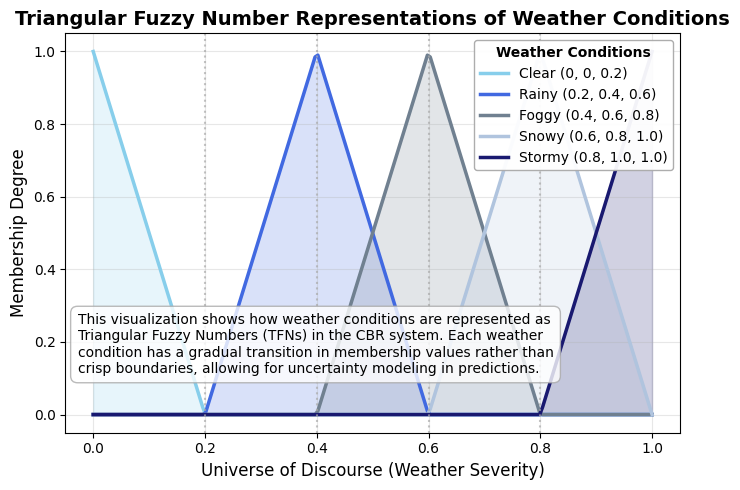

In [286]:
import matplotlib.pyplot as plt
import numpy as np

# Get weather TFNs from the linguistic mappings
weather_tfns = cbr_system.linguistic_mappings['Weather']
# Define colors for each weather condition
colors = {
    'Clear': 'skyblue',
    'Rainy': 'royalblue',
    'Foggy': 'slategray',
    'Snowy': 'lightsteelblue',
    'Stormy': 'midnightblue'
}

# Create x values for plotting
x = np.linspace(0, 1, 200)

# Plot setup
plt.figure(figsize=(7, 5))

# Plot each weather condition TFN
for weather, tfn in weather_tfns.items():
    y = fuzz.trimf(x, [tfn.left, tfn.center, tfn.right])
    plt.plot(x, y, color=colors[weather], linewidth=2.5, label=f"{weather} ({tfn.left}, {tfn.center}, {tfn.right})")
    plt.fill_between(x, y, alpha=0.2, color=colors[weather])

# Add a vertical line at specific membership values to show comparison
for value in [0.2, 0.4, 0.6, 0.8]:
    plt.axvline(x=value, color='darkgray', linestyle=':', alpha=0.7)

# Enhance the plot
plt.xlabel('Universe of Discourse (Weather Severity)', fontsize=12)
plt.ylabel('Membership Degree', fontsize=12)
plt.title('Triangular Fuzzy Number Representations of Weather Conditions', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylim(-0.05, 1.05)

# Add legend with custom styling
legend = plt.legend(title="Weather Conditions", loc='upper right', frameon=True, 
                   framealpha=0.95, edgecolor='darkgray')
legend.get_title().set_fontweight('bold')

# Add text explanation about fuzzy weather representation
explanation = "This visualization shows how weather conditions are represented as\nTriangular Fuzzy Numbers (TFNs) in the CBR system. Each weather\ncondition has a gradual transition in membership values rather than\ncrisp boundaries, allowing for uncertainty modeling in predictions."
plt.annotate(explanation, xy=(0.02, 0.15), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="darkgray", alpha=0.8),
            fontsize=10)

plt.tight_layout()
plt.show()

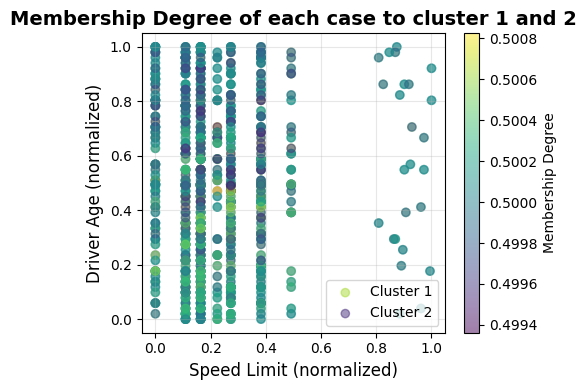

In [299]:
# Visualize fuzzy clustering of cases
import matplotlib.pyplot as plt

# Get the clustering memberships for each case
memberships = np.array([case.cluster_membership for case in cbr_system.case_library if case.cluster_membership is not None])

if len(memberships) > 0:
    # Create scatter plot for each cluster
    plt.figure(figsize=(5, 4))
    colors = ['red', 'blue', 'green']
    
    # Extract features for x and y axes (using Speed_Limit and Driver_Age as example)
    x = [case.features['Speed_Limit'].center if 'Speed_Limit' in case.features else 0 for case in cbr_system.case_library]
    y = [case.features['Driver_Age'].center if 'Driver_Age' in case.features else 0 for case in cbr_system.case_library]
    
    # Plot points colored by membership degree to each cluster
    for i in range(cbr_system.num_clusters):
        plt.scatter(x, y, c=memberships[:,i], cmap='viridis', alpha=0.5, label=f'Cluster {i+1}')
        
    plt.xlabel('Speed Limit (normalized)', fontsize=12)
    plt.ylabel('Driver Age (normalized)', fontsize=12)
    plt.title('Membership Degree of each case to cluster 1 and 2', fontsize=14, fontweight='bold')
    plt.colorbar(label='Membership Degree')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

## New Cases Exemples : 

In [282]:
#new cases exemple:
new_case = {
    'Weather': 'Foggy',
    'Road_Type': 'Mountain Road',
    'Time_of_Day': 'Evening',
    'Traffic_Density': 'Moderate',
    'Speed_Limit': 60,
    'Driver_Alcohol': 0.5,
    'Road_Condition': 'Under Construction',
    'Vehicle_Type': 'Motorcycle',
    'Driver_Age': 25,
    'Driver_Experience': 2,
    'Road_Light_Condition': 'Artificial Light'
} # predict the severity of the accident should be moderate

new_case1 = {
    'Weather': 'Clear',
    'Road_Type': 'Highway',
    'Time_of_Day': 'Morning',
    'Traffic_Density': 'Low',
    'Speed_Limit': 100,
    'Driver_Alcohol': 0.0,
    'Road_Condition': 'Dry',
    'Vehicle_Type': 'Car',
    'Driver_Age': 35,
    'Driver_Experience': 5,
    'Road_Light_Condition': 'Daylight'
}

## Predict Accident Severity and Make Recomendation 

In [283]:
# Make prediction and get recommendations
solution = cbr_system.predict_accident(new_case)
if solution.severity != "Unknown":
    
    cbr_system.retain_solution(solution)


Retrieved 5 cases (5 from primary cluster)

Found 5 similar cases

Recommendations:
1. Activate fog lights and maintain increased following distance
2. Immediate suspension of driving privileges and mandatory safety course
3. Additional driver training and supervised driving hours required
4. Ensure all vehicle lights are functional and use high-visibility clothing
5. Install temporary traffic control devices and warning signs
6. Enforce mandatory protective gear and lane splitting regulations
7. Install guard rails and warning signs for steep grades and curves
8. Implement graduated licensing system for young drivers
Predicted Severity: High
Confidence: 0.89


In [284]:
# Make prediction and get recommendations
solution = cbr_system.predict_accident(new_case1)
if solution.severity != "Unknown":
    
    cbr_system.retain_solution(solution)

Retrieved 5 cases (5 from primary cluster)

Found 5 similar cases

Recommendations:
1. Additional driver training and supervised driving hours required
2. Implement graduated licensing system for young drivers
Predicted Severity: Low
Confidence: 0.96
